In [1]:
import sys
!{sys.executable} -m pip install librosa
import scipy.io 
from scipy.io import wavfile as wav
import os
import pandas as pd
import librosa
from librosa import display
import numpy as np
import IPython.display as ipd 
from IPython.display import Audio
from glob import glob 
import matplotlib.pyplot as plt
!{sys.executable} -m pip install playsound
from playsound import playsound


playsound is relying on a python 2 subprocess. Please use `pip3 install PyObjC` if you want playsound to run more efficiently.


In [2]:
sound_data = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [3]:
sound_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
col_diff = sound_data["end"] - sound_data["start"]
sound_data.insert(5, "duration", col_diff)


In [5]:
sound_data.head()

,slice_file_name,fsID,start,end,salience,duration,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,0.317551,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,4.000000,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,4.000000,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,4.000000,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,4.000000,5,2,children_playing


In [6]:
sound_data.groupby("class").count()

,slice_file_name,fsID,start,end,salience,duration,fold,classID
class,,,,,,,,
air_conditioner,1000,1000,1000,1000,1000,1000,1000,1000
car_horn,429,429,429,429,429,429,429,429
children_playing,1000,1000,1000,1000,1000,1000,1000,1000
dog_bark,1000,1000,1000,1000,1000,1000,1000,1000
drilling,1000,1000,1000,1000,1000,1000,1000,1000
engine_idling,1000,1000,1000,1000,1000,1000,1000,1000
gun_shot,374,374,374,374,374,374,374,374
jackhammer,1000,1000,1000,1000,1000,1000,1000,1000
siren,929,929,929,929,929,929,929,929


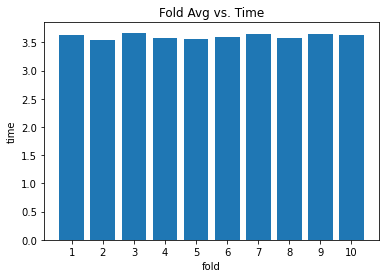

<Figure size 864x288 with 0 Axes>

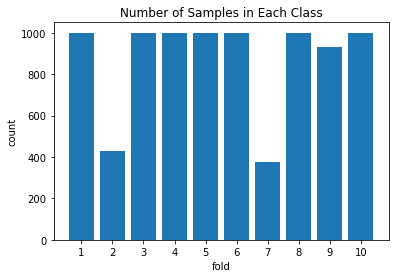

<Figure size 864x288 with 0 Axes>

In [7]:
plt.bar([1,2,3,4,5,6,7,8,9,10],sound_data.groupby("fold").mean().get("duration"))
plt.title("Fold Avg vs. Time")
plt.xlabel('fold')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('time')
plt.figure(figsize = (12,4))
plt.show()

plt.bar([1,2,3,4,5,6,7,8,9,10],sound_data.groupby("class").count().get("duration"))
plt.title("Number of Samples in Each Class")
plt.xlabel('fold')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('count')
plt.figure(figsize = (12,4))
plt.show()

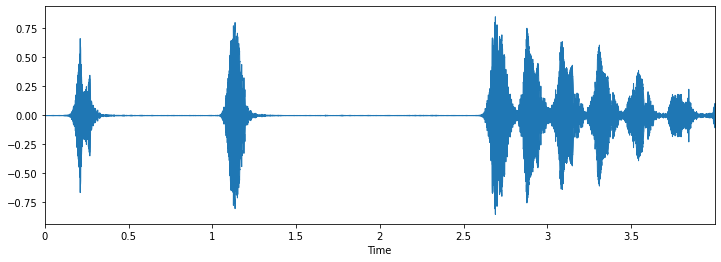

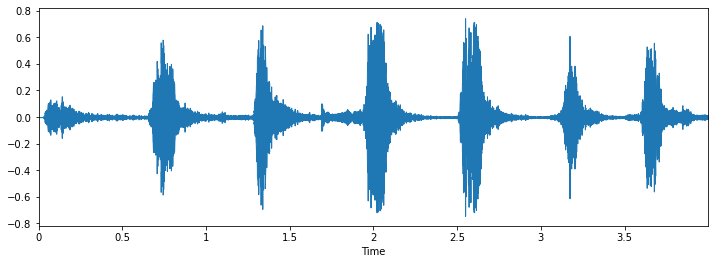

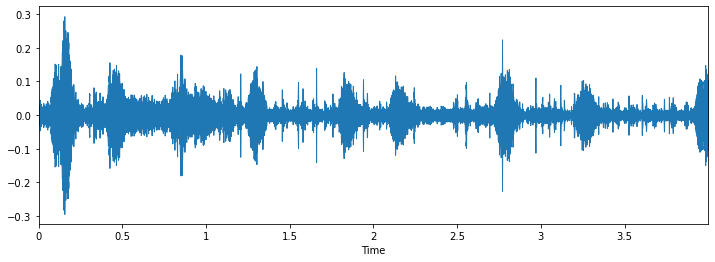

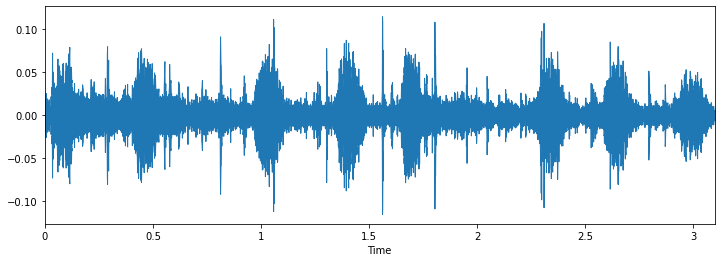

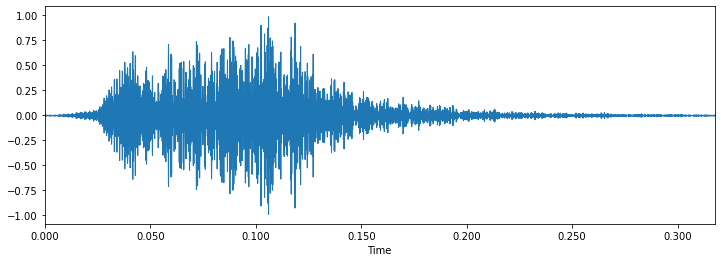

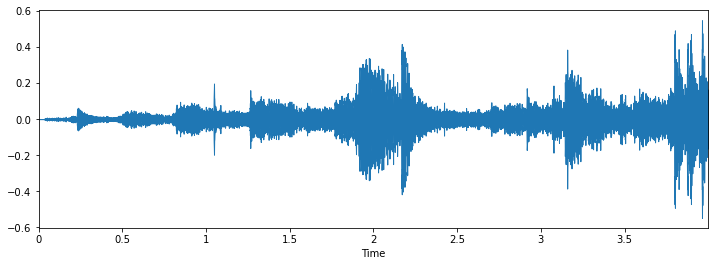

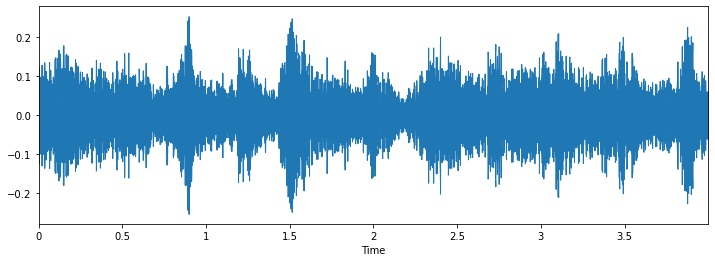

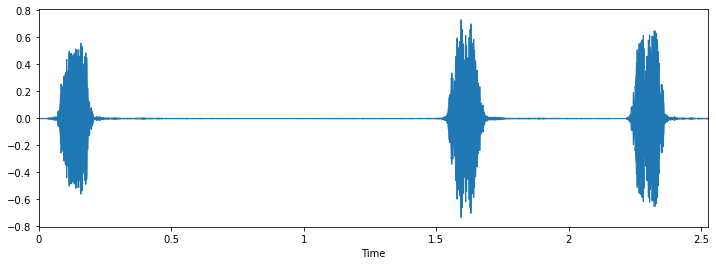

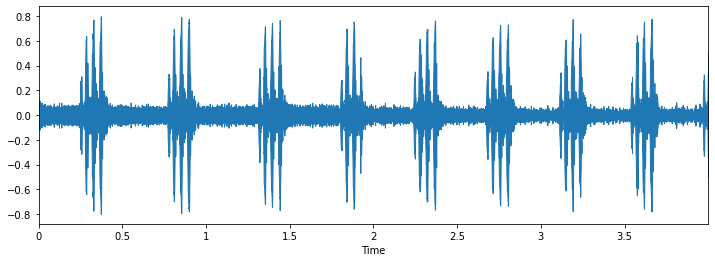

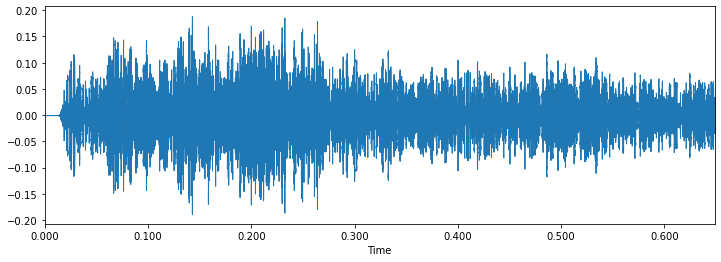

In [8]:
data, sample_rate = librosa.load('UrbanSound8K/audio/fold1/101415-3-0-2.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data, sr = sample_rate)

data2, sample_rate2 = librosa.load('UrbanSound8K/audio/fold2/100652-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data2, sr = sample_rate2)

data3, sample_rate3 = librosa.load('UrbanSound8K/audio/fold3/102105-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data3, sr = sample_rate3)

data4, sample_rate4 = librosa.load('UrbanSound8K/audio/fold4/102102-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data4, sr = sample_rate4)

data5, sample_rate5 = librosa.load('UrbanSound8K/audio/fold5/100032-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data5, sr = sample_rate5)

data6, sample_rate6 = librosa.load('UrbanSound8K/audio/fold6/101281-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data6, sr = sample_rate6)

data7, sample_rate7 = librosa.load('UrbanSound8K/audio/fold7/101848-9-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data7, sr = sample_rate7)

data8, sample_rate8 = librosa.load('UrbanSound8K/audio/fold8/103076-3-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data8, sr = sample_rate8)

data9, sample_rate9 = librosa.load('UrbanSound8K/audio/fold9/101729-0-0-1.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data9, sr = sample_rate9)

data10, sample_rate10 = librosa.load('UrbanSound8K/audio/fold10/100648-1-0-0.wav')
plt.figure(figsize = (12,4))
librosa.display.waveplot(data10, sr = sample_rate10)

In [57]:
file = 'UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [58]:
train_files = glob(file.format(os.path.abspath('../')))

In [59]:
a, b = librosa.load(file)
ipd.Audio(file)

In [36]:
#stereo --> two channels
file2 = 'UrbanSound8K/audio/fold5/100263-2-0-3.wav'

In [37]:
wave_sample_rate, wave_audio = wav.read(file2)

In [38]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

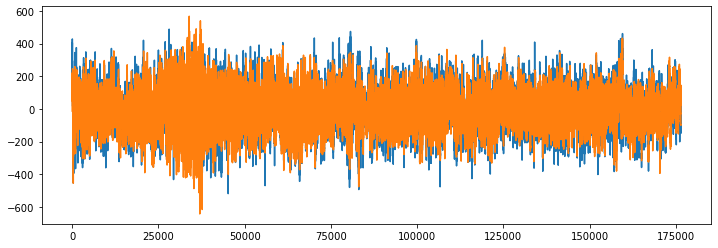

In [39]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [40]:
librosa_audio_data,librosa_sample_rate=librosa.load(file2)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [42]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [43]:
from tqdm import tqdm
#iterate through audio files and extract features using Mel-Frequency Cepstral Coefficients
extracted_features=[]
audio_data_path = 'UrbanSound8K/audio'
for index_num,row in tqdm(sound_data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_data_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

109it [00:04, 25.02it/s]


KeyboardInterrupt: 

In [44]:
features =pd.DataFrame(extracted_features,columns=['feature','class'])
features.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


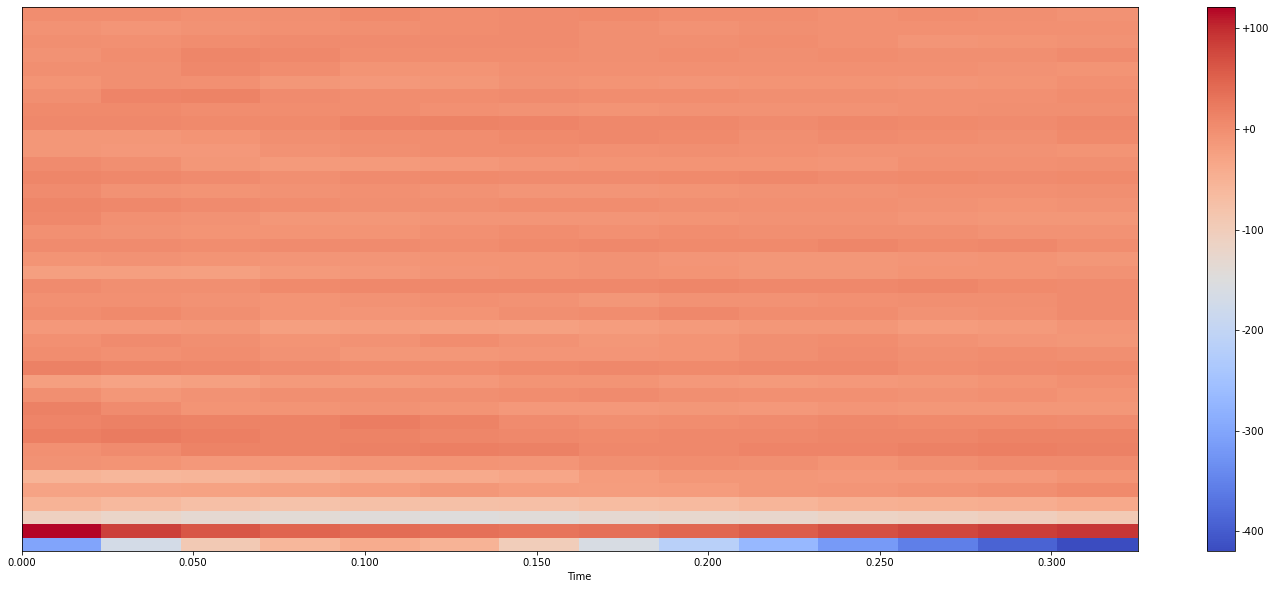

In [45]:
y,sr=librosa.load(file)
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

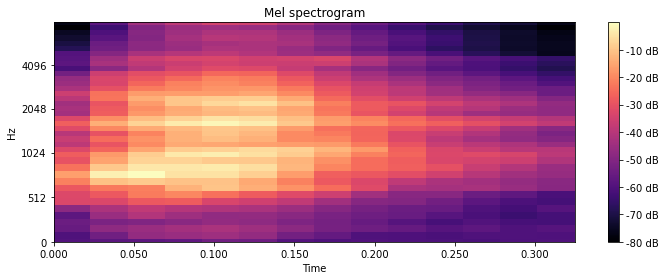

In [60]:
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav") #tiny dog
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

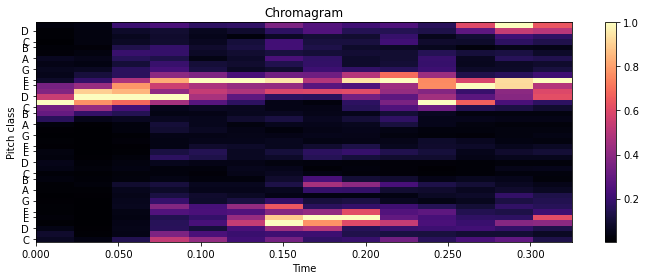

In [61]:
#an audio file can consist of 12 
#different pitch classes. These pitch class profiles 
#are very useful tools for analyzing audio files
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()